In [4]:
import pandas as pd 
import numpy 
import random

In [5]:
train = pd.read_csv("./data/train.csv")
test = pd.read_csv("./data/test.csv")

In [6]:
train.Survived.value_counts(normalize=True)

Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64

In [7]:
train.shape

(891, 12)

In [8]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
import numpy as np 
train.PassengerId = train.PassengerId.astype(np.float32) 

In [10]:
train[['PassengerId', 'Survived']] = train[['PassengerId', 'Survived']].astype(int)

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [12]:
# label encoder 
#train.loc[train.Sex == 'male', 'Sex'] = 0 

In [13]:
# One-hot encoder 
train.loc[train.Sex == 'male', 'male'] = True
train.loc[train.Sex == 'male', 'female'] = False

In [14]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male,female
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,True,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,NaN,NaN
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,NaN,NaN
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,True,False
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,NaN,NaN
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,NaN,NaN
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,True,False


In [15]:
import matplotlib.pyplot as plt 
import seaborn as sns 

In [16]:
plt.style.use('ggplot')

In [17]:
train[['Embarked', 'Survived', 'PassengerId']].isnull().sum()

Embarked       2
Survived       0
PassengerId    0
dtype: int64

In [32]:
plt.rcParams['font.family'] = 'NanumGothic'

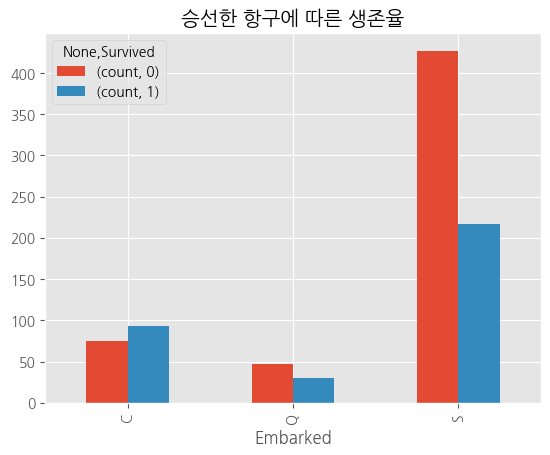

In [33]:
train[['Embarked', 'Survived', 'PassengerId']].\
    groupby(['Embarked', 'Survived'])[['PassengerId']].count().\
    rename(columns={'PassengerId' : 'count'}).\
    unstack().plot.bar(stacked=False)
plt.title("승선한 항구에 따른 생존율")
plt.show()

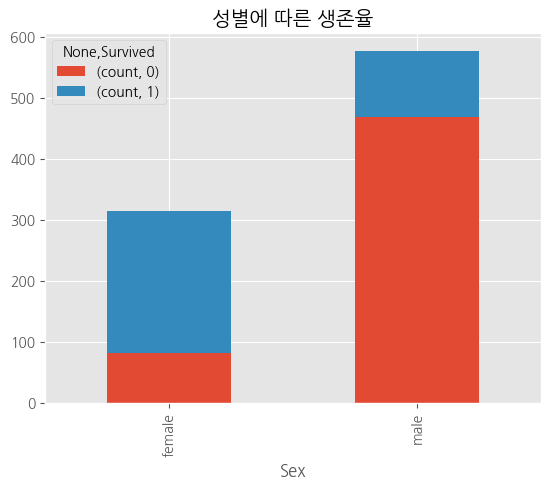

In [35]:
train[['Sex', 'Survived', 'PassengerId']].\
    groupby(['Sex', 'Survived'])[['PassengerId']].count().\
    rename(columns={'PassengerId' : 'count'}).\
    unstack().plot.bar(stacked=True)
plt.title("성별에 따른 생존율")
plt.show()

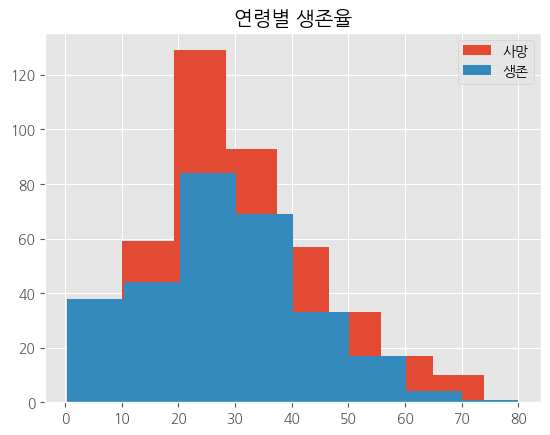

In [45]:
plt.hist( x = train.loc[ train.Survived == 0 , 'Age'], bins=8, label=['사망'] )
plt.hist( x = train.loc[ train.Survived == 1 , 'Age'], bins=8, label=['생존'] )
plt.title("연령별 생존율")
plt.legend()
plt.show()

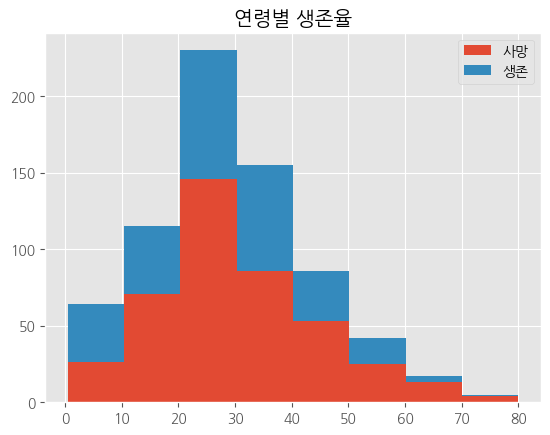

In [46]:
plt.hist( x = [train.loc[ train.Survived == 0 , 'Age'],train.loc[ train.Survived == 1 , 'Age']]
         , bins=8, histtype='barstacked', label=['사망', '생존']  )
plt.title("연령별 생존율")
plt.legend()
plt.show()

In [50]:
train.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [52]:
train_corr = pd.get_dummies(train, columns=['Sex'], drop_first=True)
train_corr = pd.get_dummies(train_corr, columns=['Embarked'])


In [57]:
train_corr.drop([ 'male', 'female'], axis=1, inplace=True)

/home/play/miniconda3/envs/pandas/lib/python3.12/site-packages/seaborn/utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumGothic.
  fig.canvas.draw()
/home/play/miniconda3/envs/pandas/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


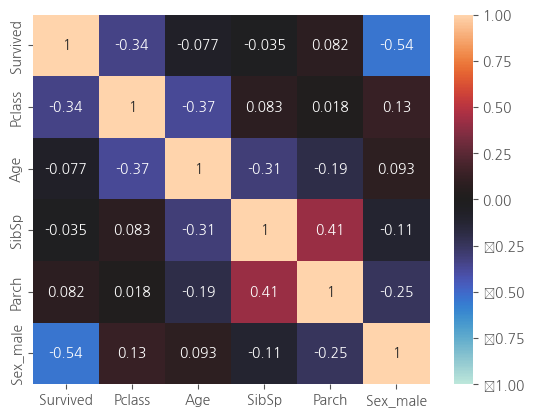

In [71]:
sns.heatmap(train_corr[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Sex_male']].corr(), 
            vmax=1, vmin=-1, center=0, annot=True)
plt.show()

In [65]:
import sqlalchemy

user= 'play'
password = '123'
host='192.168.0.22'
port = 3306
database='sk17'
engine = sqlalchemy.create_engine(f"mysql://{user}:{password}@{host}:{port}/{database}")
df = pd.read_sql_query("select * from naver_day_stock where st_code = 'A005930'", con=engine)

In [67]:
kbo = pd.read_sql_table("kbo_detail", con=engine)

In [69]:
kbo[['신장', '체중']].corr()

,신장,체중
신장,1.000000,0.570398
체중,0.570398,1.000000


In [72]:
import requests 
url = "https://www.starbucks.co.kr/store/getStore.do?r=86N465IIB2"
payload = {"in_biz_cds": "0",
"in_scodes": "0",
"ins_lat": "37.4745",
"ins_lng": "126.8918",
"search_text": "",
"p_sido_cd": "01",
"p_gugun_cd": "",
"in_distance": "0",
"in_biz_cd": "",
"isError": "true",
"searchType": "C",
"set_date": "",
"all_store": "0",
"T03": "0",
"T01": "0",
"T27": "0",
"T12": "0",
"T09": "0",
"T30": "0",
"T05": "0",
"T22": "0",
"T21": "0",
"T36": "0",
"T43": "0",
"Z9999": "0",
"T64": "0",
"T66": "0",
"P02": "0",
"P10": "0",
"P50": "0",
"P20": "0",
"P60": "0",
"P30": "0",
"P70": "0",
"P40": "0",
"P80": "0",
"whcroad_yn": "0",
"P90": "0",
"P01": "0",
"new_bool": "0",
"iend": "1000",
"rndCod": "XW4W0LA4X8",}
r = requests.post(url, data=payload)
star = r.json()


### 서울시 25개 지역구의 스타벅스 갯수 집계 테이블 만들기 
- 지도위에 히트맵 생성

In [76]:
star_df = pd.DataFrame(star['list'])

In [84]:
star_df.isnull().sum()

seq           0
sido_cd     643
sido_nm     643
gugun_cd    643
gugun_nm    643
           ... 
t48           0
z9999         0
t64           0
t66           0
p02           0
Length: 137, dtype: int64

In [90]:
star_agg = star_df.groupby('gugun_name')[['seq']].count().rename(columns={'seq' : "count"})


In [91]:
import json 
geo_data = json.load(open("./data/skorea_municipalities_geo_simple.json", "r"))

In [ ]:
pip install  folium

In [130]:
import folium

seoul_map = folium.Map(location=[37.55, 126.88],  tiles="Cartodb Positron", zoom_start=12)

In [110]:
star_agg.head(1)

,count
gugun_name,
강남구,96


In [ ]:
star_agg['count']

In [ ]:
star_agg['count']

In [ ]:
seoul_map = folium.Map(location=[37.55, 126.88],  tiles="Cartodb Positron", zoom_start=12)
g_map = folium.Choropleth(geo_data=geo_data, data=star_agg['count'], 
                  #columns=[star_agg.index, star_agg.count],
                  fill_color='YlOrRd', fill_opacity=0.7, line_opacity=0.3, key_on = 'feature.properties.name'
                  )
g_map.add_to(seoul_map)

In [136]:
seoul_map

In [ ]:
import zipfile